## Two hidden layer neural network

In [57]:
import pandas as pd
import numpy as np
from random import seed
from random import random
from math import exp
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [28]:
class layer:
    
    '''
    This class represents a full connected layer which makes our ANN
    Each layer will have its weights and bias

    '''
    def __init__(self,NumberOfNeurons, dimension_1, dimension_2):
        range_value = np.sqrt(2/dimension_2)
        self.weight = np.random.uniform(-range_value,range_value,(dimension_2,dimension_1))
        #self.weight = np.random.randn(dimension_2, dimension_1)
        self.bias = np.random.uniform(-range_value,range_value,(dimension_2, 1))

In [30]:
class NeuralNet:
    
    def __init__(self):
        
        self.layer_1 = layer(2,2,5)
        self.layer_2 = layer(5,5, 5)
        self.layer_3 = layer(5, 5, 1)
        
    # Transfer neuron activation
    def sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    # Calculate the derivative of an neuron output
    def sigmoid_derivative(self, output):
        return output * (1.0 - output)
    
    def forward_pass(self, data):
        
        cache = {}
        
        a_2 = self.sigmoid(np.dot(self.layer_1.weight, data.T))
        a_3 = self.sigmoid(np.dot(self.layer_2.weight.T, a_2))
        a_4 = self.sigmoid(np.dot(self.layer_3.weight, a_3))   # a_4 is the final layer output which is a row vector
        
        cache = {'a_2': a_2, 'a_3': a_3, 'a_4': a_4}
        return a_4, cache
    
    def calculate_loss(self, Y_hat, Y):
        # probs and labels must be row vectors
        
#         epsilon=1e-12
#         probs = np.clip(probs, epsilon, 1.0 - epsilon)
        
#         loss = (labels * np.log(probs)) + ((1.0 - labels) * np.log(1.0 - probs))
#         loss = - np.mean(loss)   
        
        m =  Y_hat.shape[0]
        loss = -1/m * (np.dot(Y, np.log(Y_hat).T) + np.dot(1 - Y, np.log(1 - Y_hat).T))
        return loss
        
        
    def backward_pass(self, cache, labels, X):
        batch_size = X.shape[0]
        
        intermediate = (cache['a_4'] - labels)
        dW4 = np.dot(intermediate, cache['a_3'].T)
        dW4 = dW4/ batch_size
        
        intermediate = np.dot((self.layer_3.weight).T , intermediate)
        intermediate = intermediate * self.sigmoid_derivative(cache['a_3'])
        dW3 = np.dot(intermediate, cache['a_2'].T)
        dW3 = dW3 / batch_size
        
        intermediate = np.dot((self.layer_2.weight).T , intermediate)
        intermediate = intermediate * self.sigmoid_derivative(cache['a_2'])
        dW2 = np.dot(intermediate, X)
        dW2 = dW2/ batch_size
        
        return {'dW4':dW4, 'dW3':dW3, 'dW2':dW2}

In [31]:
# data = np.random.rand(2, 50)
# labels = np.random.randint(0, 2, 50)
# nn = NeuralNet()

In [89]:
train_data = pd.read_csv('DWH_Training.csv', names= ['Height', 'Weight', 'Label'])
test_data = pd.read_csv('DWH_test.csv',  names= ['Height', 'Weight', 'Label'])

In [90]:
net = NeuralNet()

In [91]:
net = NeuralNet()
epochs = 500
lr = 0.1
losses = []
for epoch in range(epochs):
    
    data, labels = np.array(train_data[['Height', 'Weight']]), np.array(train_data['Label'])
    scaler = StandardScaler().fit(data)
    data = scaler.transform(data)
    
    preds, cache = net.forward_pass(data)
    loss = net.calculate_loss(preds, labels)
    #print(preds)
    #print("Loss ", loss)
    losses.append(loss.item())
    gradients = net.backward_pass(cache, labels, data)
    
    net.layer_1.weight -= lr * gradients['dW2']
    net.layer_2.weight -= lr * gradients['dW3']
    net.layer_3.weight -= lr * gradients['dW4']

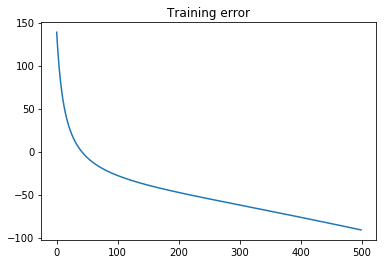

In [84]:
plt.plot(losses)
title = plt.title("Training error")